# Business Understanding
The primary objective is to identify individuals likely to experience depression based on various factors, facilitating early preventive interventions and treatments. Key stakeholders include healthcare institutions, insurance companies, community welfare organizations, and individuals seeking to understand their mental health risks. The model offers several business benefits, such as cost savings in healthcare by enabling early detection of depression, improved community well-being through targeted interventions, and data-driven decision-making for effective policy formulation. The results will guide healthcare professionals in developing action plans for those identified as at risk.

## Data Understanding

## Attributes Used in the Analysis

The following attributes will be used in the analysis:

- **Age:** The age of the individual, which may influence mental health.
- **Marital Status:** The current marital situation (e.g., single, married, divorced), potentially impacting emotional well-being.
- **Education Level:** The highest level of education attained, which can correlate with socioeconomic status and mental health.
- **Employment Status:** The current employment situation (e.g., employed, unemployed), affecting financial stability and self-esteem.
- **Smoking Status:** The individual's smoking habits, as smoking can be linked to mental health issues.
- **Family History of Depression:** Whether there is a family history of depression, which can increase the risk for the individual.
- **Income:** The annual income of the individual, which may influence access to healthcare and overall well-being.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
#Import pandas to read dataset from csv and assign it to a variable
df = pd.read_csv("depression_data.csv")

In [3]:
# Take all the needed columns
df_subset= df[['Age', 'Marital Status','Education Level','Employment Status','Smoking Status','Family History of Depression', 'Income', ]]

In [4]:
df.head(10)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [5]:
df_subset.head()

,Age,Marital Status,Education Level,Employment Status,Smoking Status,Family History of Depression,Income
0,31,Married,Bachelor's Degree,Unemployed,Non-smoker,Yes,26265.67
1,55,Married,High School,Employed,Non-smoker,No,42710.36
2,78,Widowed,Master's Degree,Employed,Non-smoker,Yes,125332.79
3,58,Divorced,Master's Degree,Unemployed,Non-smoker,No,9992.78
4,18,Single,High School,Unemployed,Non-smoker,Yes,8595.08


In [6]:
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  413768
Jumlah Kolom :  16


In [7]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Employment Status             413768 non-null  object 
 4   Smoking Status                413768 non-null  object 
 5   Family History of Depression  413768 non-null  object 
 6   Income                        413768 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.1+ MB


In [8]:
df_subset.describe()

,Age,Income
count,413768.000000,413768.000000
mean,49.000713,50661.707971
std,18.158759,40624.100565
min,18.000000,0.410000
25%,33.000000,21001.030000
50%,49.000000,37520.135000
75%,65.000000,76616.300000
max,80.000000,209995.220000


In [9]:
# Change data type of Age from float to int
df_subset_ct = df_subset.astype({'Income': int}) 

In [10]:
df_subset_ct.dtypes

Age                              int64
Marital Status                  object
Education Level                 object
Employment Status               object
Smoking Status                  object
Family History of Depression    object
Income                           int64
dtype: object

In [11]:
# Change data type of Age from float to int
df_subset_ct = df_subset.astype({'Income': int}) 

### Outlier

In [12]:
q1 = df_subset_ct.select_dtypes(exclude='object').quantile(0.25)
q3 = df_subset_ct.select_dtypes(exclude='object').quantile(0.75)
iqr = q3 - q1
iqr

Age          32.0
Income    55615.0
dtype: float64

In [13]:
batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

In [14]:
df_numerical = df_subset_ct.select_dtypes(exclude='object')
outlier = ((df_numerical < batas_bawah) | (df_numerical > batas_atas))
outlier

,Age,Income
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413763,False,False
413764,False,False
413765,False,False
413766,False,False


In [15]:
for col in outlier.columns :
    if df_subset_ct[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier[col].value_counts())
        print('-------------------')

Nama Kolom: Age
Age
False    413768
Name: count, dtype: int64
-------------------
Nama Kolom: Income
Income
False    408611
True       5157
Name: count, dtype: int64
-------------------


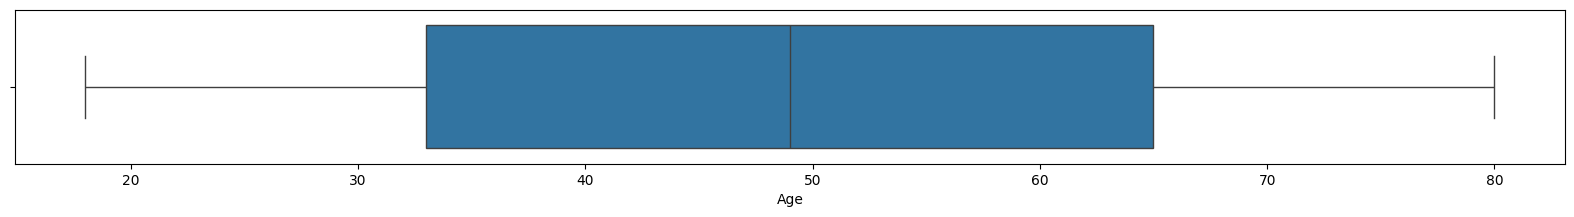

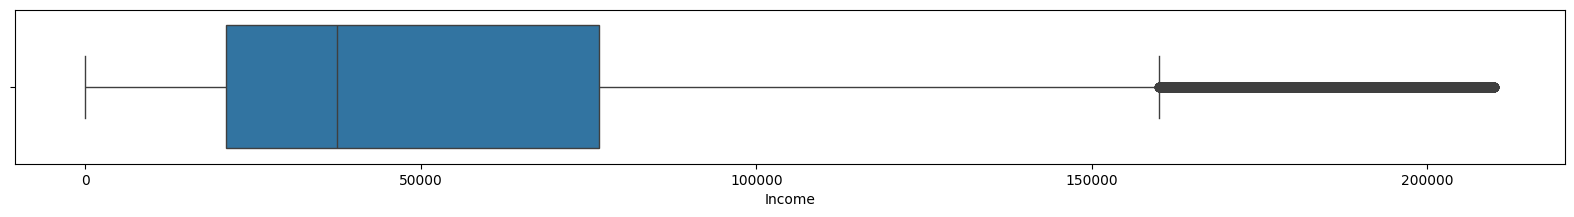

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
df_outlier = df_subset_ct.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [17]:
from scipy.stats.mstats import winsorize

In [18]:
df_subset_ct.loc[:,'Age'] = winsorize(df_subset_ct.loc[:,'Age'], limits =[0,0.01])

<Axes: xlabel='Age'>

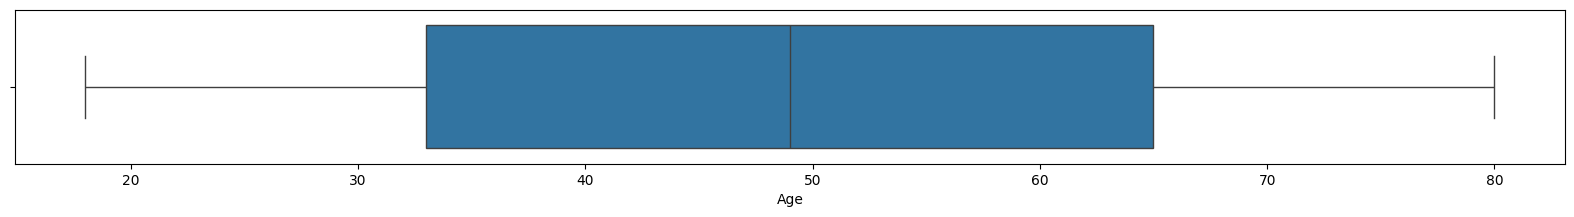

In [19]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_subset_ct, x=df_subset_ct['Age'])

### Visualization

In [20]:
dietbased_overview=pd.DataFrame(df['Dietary Habits'].value_counts())

In [21]:
dietbased_overview

,count
Dietary Habits,
Unhealthy,170817
Moderate,170446
Healthy,72505


In [22]:
smoking_status=pd.DataFrame(df['Smoking Status'].value_counts())
smoking_status.rename_axis('Smoking Status',inplace=True)
smoking_status.columns=['Total Count']
smoking_status= smoking_status.reset_index()
smoking_status

,Smoking Status,Total Count
0,Non-smoker,247416
1,Former,116184
2,Current,50168


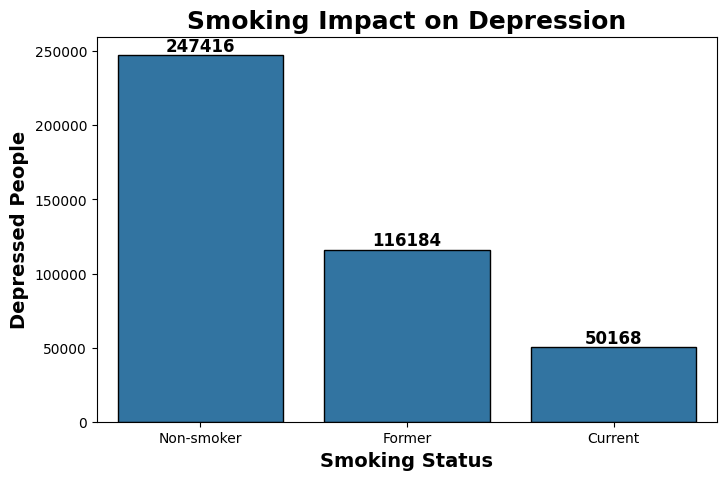

In [23]:
plt.figure(figsize=(8,5))
bar = sns.barplot(x='Smoking Status', y='Total Count', data=smoking_status, edgecolor='black')

plt.title('Smoking Impact on Depression',fontsize=18,weight='bold')
plt.xlabel('Smoking Status',fontsize=14,weight='bold')
plt.ylabel('Depressed People',fontsize=14,weight='bold')
for i in range(len(dietbased_overview)):
    plt.text(i, smoking_status['Total Count'][i] ,smoking_status['Total Count'][i],  ha='center', 
             va='bottom', fontsize=12, fontweight='bold')
plt.show()

In [24]:
Employment_Status=pd.DataFrame(df['Employment Status'].value_counts())
Employment_Status.rename_axis('Employment Status',inplace=True)
Employment_Status.columns=['Total Count']
Employment_Status=Employment_Status.reset_index()
Employment_Status

,Employment Status,Total Count
0,Employed,265659
1,Unemployed,148109


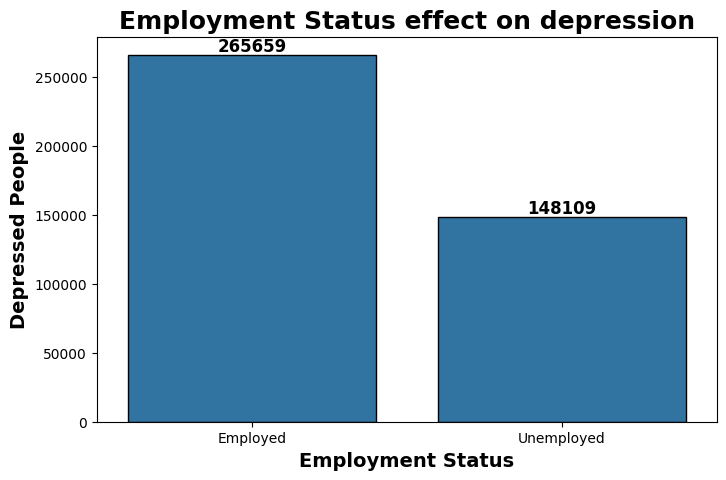

In [25]:
plt.figure(figsize=(8,5))
bar = sns.barplot(x='Employment Status', y='Total Count', data=Employment_Status, edgecolor='black')

plt.title('Employment Status effect on depression',fontsize=18,weight='bold')
plt.xlabel('Employment Status',fontsize=14,weight='bold')
plt.ylabel('Depressed People',fontsize=14,weight='bold')
for i in range(len(Employment_Status)):
    plt.text(i, Employment_Status['Total Count'][i] , Employment_Status['Total Count'][i], 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

In [26]:
Alcohol_Consumption=pd.DataFrame(df['Alcohol Consumption'].value_counts())
Alcohol_Consumption.rename_axis('Alcohol Consumption',inplace=True)
Alcohol_Consumption.columns=['Total Count']
Alcohol_Consumption=Alcohol_Consumption.reset_index()
Alcohol_Consumption

,Alcohol Consumption,Total Count
0,Moderate,173440
1,Low,139250
2,High,101078


In [27]:
PAL_effect=pd.DataFrame(df['Physical Activity Level'].value_counts())
PAL_effect.rename_axis('Physical Activity Level',inplace=True)
PAL_effect.columns=['Total Count']
PAL_effect=PAL_effect.reset_index()
PAL_effect

,Physical Activity Level,Total Count
0,Sedentary,176850
1,Moderate,158013
2,Active,78905


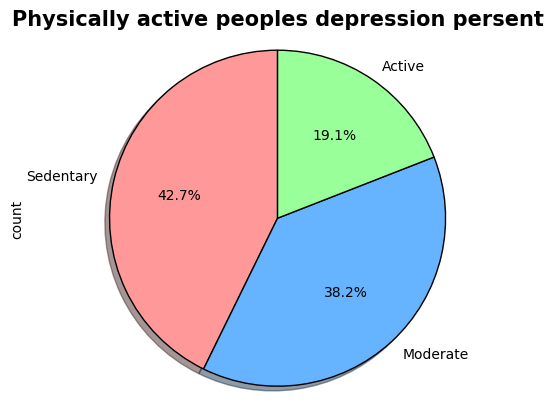

In [28]:
df['Physical Activity Level'].value_counts().plot(kind = 'pie' , autopct= '%0.1f%%', 
                                                  colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                                                  shadow=True,startangle=90, wedgeprops={'edgecolor': 'black'} )
plt.title('Physically active peoples depression persent',fontsize=15,weight='bold')
plt.axis('equal')  
plt.show()

In [29]:
Age_status=pd.DataFrame(df['Age'].value_counts())
Age_status.rename_axis('Age',inplace=True)
Age_status.columns=['Total Count']
Age_status=Age_status.reset_index()
Age_status

,Age,Total Count
0,42,6740
1,47,6700
2,43,6700
3,24,6695
4,52,6693
...,...,...
58,18,6470
59,65,6449
60,76,6442
61,35,6429


In [30]:
bins=[0,19,65,81]
labels=['teens(0-19)','adults(20-65)','seniors(66-100)']
Age_status['Category']=pd.cut(Age_status['Age'],bins=bins,labels=labels)

In [31]:
age_category = pd.DataFrame(Age_status.groupby('Category', observed=False)['Total Count'].sum()).reset_index()

In [32]:
age_category

,Category,Total Count
0,teens(0-19),13058
1,adults(20-65),302552
2,seniors(66-100),98158


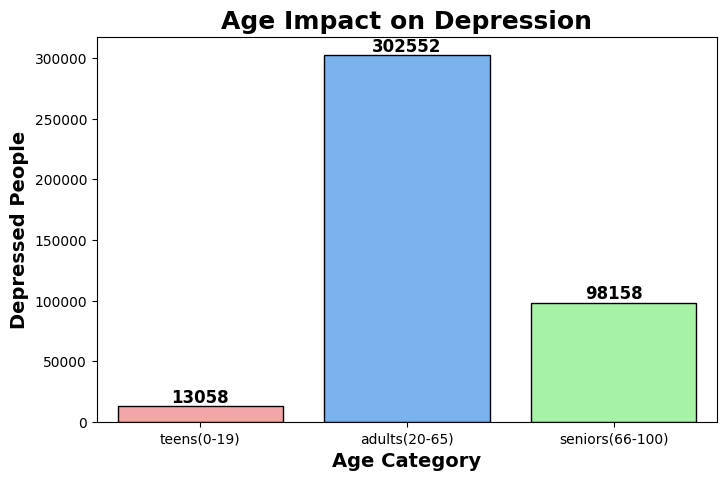

In [33]:
plt.figure(figsize=(8,5))

# Assigning 'Category' to hue to avoid the warning
bar = sns.barplot(x='Category', y='Total Count', data=age_category, hue='Category', 
                  palette=['#FF9999', '#66B2FF', '#99FF99'], edgecolor='black', dodge=False)

# Title and axis labels with proper formatting
plt.title('Age Impact on Depression', fontsize=18, weight='bold')
plt.xlabel('Age Category', fontsize=14, weight='bold')
plt.ylabel('Depressed People', fontsize=14, weight='bold')

# Adding data labels on top of the bars
for i in range(len(age_category)):
    plt.text(i, age_category['Total Count'][i] + 0.5,  # Added 0.5 for better positioning above the bar
             age_category['Total Count'][i], ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

# Removing the legend since hue is used only for color and not categorization
plt.legend([], [], frameon=False)

plt.show()


In [34]:
Marital_Status=pd.DataFrame(df['Marital Status'].value_counts())
Marital_Status.rename_axis('Marital Status',inplace=True)
Marital_Status.columns=['Total Count']
Marital_Status=Marital_Status.reset_index()
Marital_Status

,Marital Status,Total Count
0,Married,240444
1,Single,72110
2,Widowed,68485
3,Divorced,32729


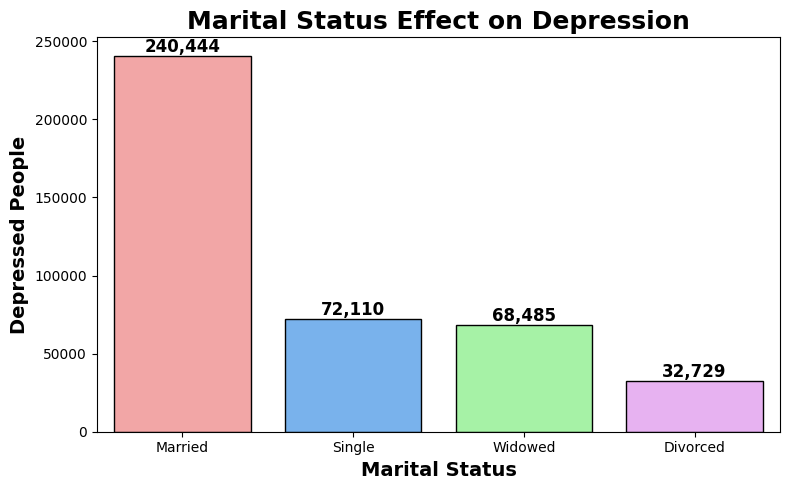

In [35]:
plt.figure(figsize=(8,5))

# Setting hue='Marital Status' to avoid the FutureWarning
bar = sns.barplot(x='Marital Status', y='Total Count', data=Marital_Status, 
                  hue='Marital Status', palette=['#FF9999', '#66B2FF', '#99FF99', '#eea7fc'], 
                  edgecolor='black', dodge=False)

# Title and labels
plt.title('Marital Status Effect on Depression', fontsize=18, weight='bold')
plt.xlabel('Marital Status', fontsize=14, weight='bold')
plt.ylabel('Depressed People', fontsize=14, weight='bold')

# Adding labels to each bar with a better position for clarity
for i in range(len(Marital_Status)):
    plt.text(i, Marital_Status['Total Count'][i] + 0.5,  # Slightly above the bar
             f'{Marital_Status["Total Count"][i]:,}', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

# Remove the legend since hue is used only for color
plt.legend([], [], frameon=False)

# Tight layout for better spacing
plt.tight_layout()

plt.show()

In [36]:
df['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [37]:
Education_Level=pd.DataFrame(df['Education Level'].value_counts())
Education_Level.rename_axis('Education Level',inplace=True)
Education_Level.columns=['Total Count']
Education_Level=Education_Level.reset_index()
Education_Level

,Education Level,Total Count
0,Bachelor's Degree,124329
1,High School,118927
2,Associate Degree,79999
3,Master's Degree,73768
4,PhD,16745


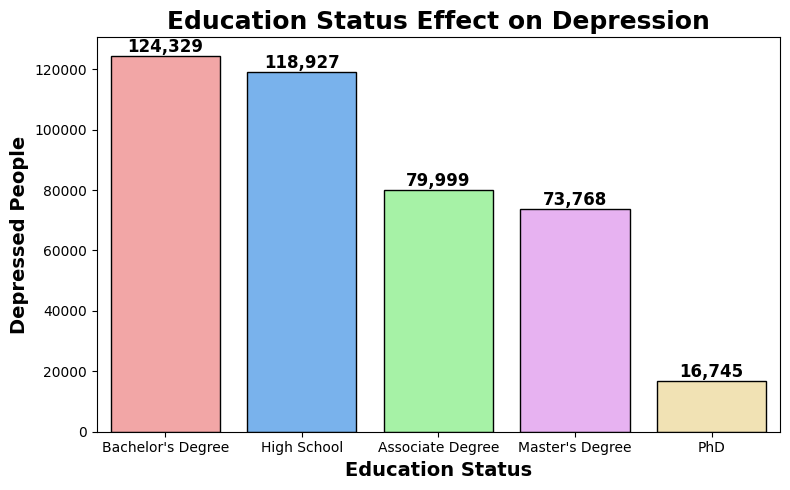

In [38]:
plt.figure(figsize=(8, 5))

# Setting hue='Education Level' to avoid the FutureWarning
bars = sns.barplot(x='Education Level', y='Total Count', data=Education_Level, 
                   hue='Education Level', palette=['#FF9999', '#66B2FF', '#99FF99', '#eea7fc', '#fbe7aa'], 
                   edgecolor='black', dodge=False)

# Title and labels
plt.title('Education Status Effect on Depression', fontsize=18, weight='bold')
plt.xlabel('Education Status', fontsize=14, weight='bold')
plt.ylabel('Depressed People', fontsize=14, weight='bold')

# Adding labels to each bar
for i in range(len(Education_Level)):
    plt.text(i, Education_Level['Total Count'][i] + 0.5,  # Slightly above the bar
             f'{Education_Level["Total Count"][i]:,}', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

# Remove the legend since hue is used only for color
plt.legend([], [], frameon=False)

# Tight layout for better spacing
plt.tight_layout()

plt.show()

In [39]:
Married_Education = df.groupby(['Marital Status','Education Level'])['Marital Status'].count().reset_index(name = 
                                                                                        'Count Of Married or Unmarried')
Married_Education

,Marital Status,Education Level,Count Of Married or Unmarried
0,Divorced,Associate Degree,6661
1,Divorced,Bachelor's Degree,9812
2,Divorced,High School,8193
3,Divorced,Master's Degree,6455
4,Divorced,PhD,1608
5,Married,Associate Degree,47535
6,Married,Bachelor's Degree,73573
7,Married,High School,62126
8,Married,Master's Degree,46194
9,Married,PhD,11016


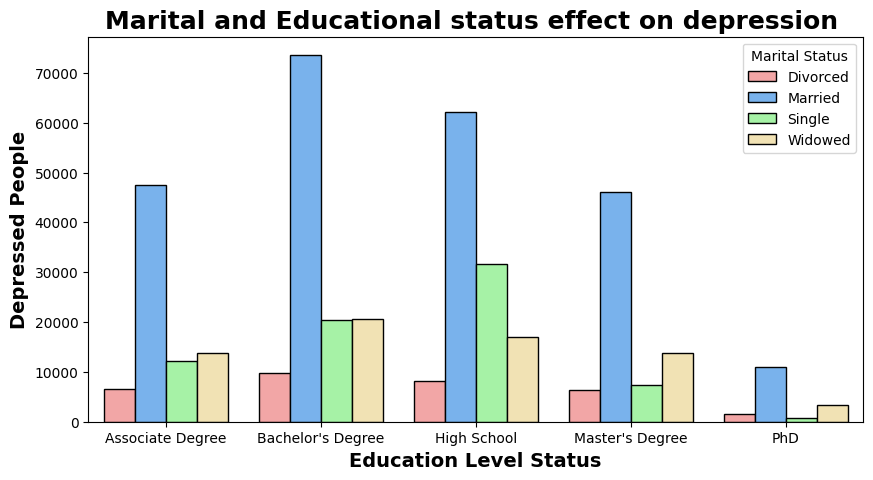

In [40]:
fig, ax = plt.subplots(figsize= (10,5))
sns.barplot(x = 'Education Level', y = 'Count Of Married or Unmarried',data = Married_Education,palette= 
            ['#FF9999', '#66B2FF', '#99FF99','#fbe7aa'], edgecolor='black',
 hue = 'Marital Status')
plt.title('Marital and Educational status effect on depression ',fontsize=18,weight='bold')
plt.xlabel('Education Level Status',fontsize=14,weight='bold')
plt.ylabel('Depressed People',fontsize=14,weight='bold')
plt.show()

## Calculating and visualizing :- Income Status Overview by age category¶

In [41]:
bins=[0,19,65,81]
labels=['teens(0-19)','adults(20-65)','seniors(66-100)']
df['age_category']=pd.cut(Age_status['Age'],bins=bins,labels=labels)

In [42]:
df_subset.head(2)

,Age,Marital Status,Education Level,Employment Status,Smoking Status,Family History of Depression,Income
0,31,Married,Bachelor's Degree,Unemployed,Non-smoker,Yes,26265.67
1,55,Married,High School,Employed,Non-smoker,No,42710.36


In [43]:
income_overview = pd.DataFrame(df.groupby('age_category', observed=False)['Income'].sum()).reset_index()

In [44]:
income_overview

,age_category,Income
0,teens(0-19),106678.50
1,adults(20-65),2149236.09
2,seniors(66-100),693002.41


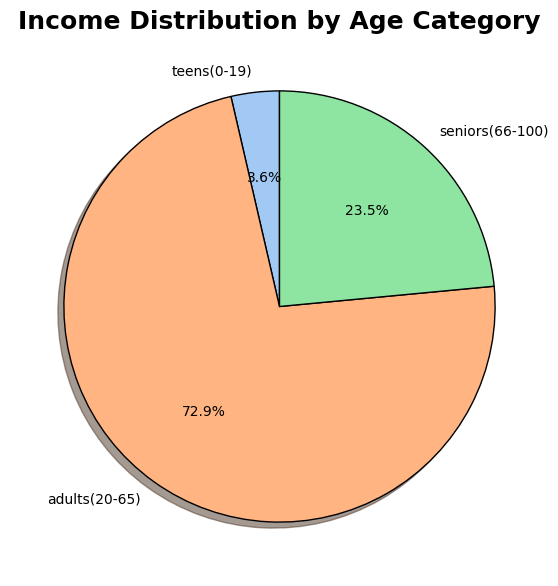

In [45]:
plt.figure(figsize=(7,7))
plt.pie(income_overview['Income'], labels=income_overview['age_category'], autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'),shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Income Distribution by Age Category', fontsize=18, weight='bold')


plt.show()

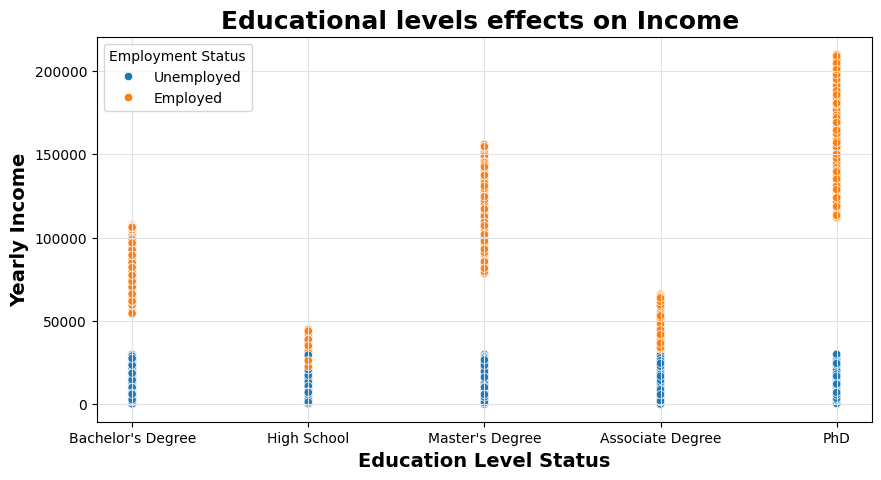

In [46]:
fig, ax = plt.subplots(figsize= (10,5))
sns.scatterplot(x = 'Education Level',y = 'Income',data = df.sort_values(by = []), hue = 'Employment Status' )
plt.title('Educational levels effects on Income ',fontsize=18,weight='bold')
plt.xlabel('Education Level Status',fontsize=14,weight='bold')
plt.ylabel('Yearly Income',fontsize=14,weight='bold')
plt.grid(color='#e2e2e6')
plt.show()

In [47]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,age_category
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,adults(20-65)
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,adults(20-65)
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,adults(20-65)
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,adults(20-65)
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,adults(20-65)


In [48]:
mental_illness_history=pd.DataFrame(df['History of Mental Illness'].value_counts())
mental_illness_history.rename_axis('History of Mental Illness',inplace=True)
mental_illness_history.columns=['Total Count']
mental_illness_history=mental_illness_history.reset_index()
mental_illness_history

,History of Mental Illness,Total Count
0,No,287943
1,Yes,125825


/tmp/ipykernel_650088/71495593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='History of Mental Illness', y='Total Count', data=mental_illness_history,


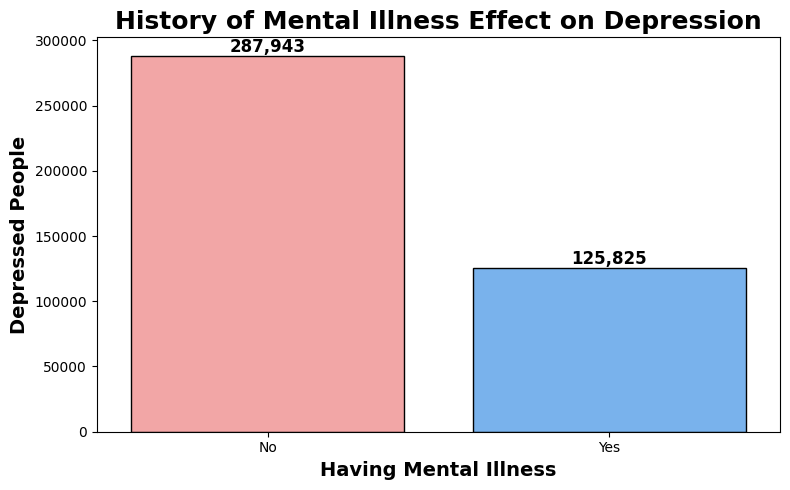

In [49]:
plt.figure(figsize=(8, 5))
# Jika hanya ada dua kategori, sesuaikan palet warnanya
bars = sns.barplot(x='History of Mental Illness', y='Total Count', data=mental_illness_history, 
                   palette=['#FF9999', '#66B2FF'], edgecolor='black')

plt.title('History of Mental Illness Effect on Depression', fontsize=18, weight='bold')
plt.xlabel('Having Mental Illness', fontsize=14, weight='bold')
plt.ylabel('Depressed People', fontsize=14, weight='bold')

for i in range(len(mental_illness_history)):
    plt.text(i, mental_illness_history['Total Count'][i],   # X and Y coordinates
             f'{mental_illness_history["Total Count"][i]:,}', # Text to display
             ha='center', va='bottom', fontsize=12, fontweight='bold')
    
plt.tight_layout()
plt.show()

## Modelling




# Scaling and Encoding

In [50]:

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [63]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Marital Status','Education Level','Employment Status','Smoking Status','Family History of Depression']

In [64]:
from sklearn import preprocessing

# Encoding Kolom Kategori
le = preprocessing.LabelEncoder()

# Gunakan .loc untuk menghindari SettingWithCopyWarning
df_subset.loc[:, cat_col] = df_subset[cat_col].apply(le.fit_transform)

In [65]:
df_subset.head()

,Age,Marital Status,Education Level,Employment Status,Smoking Status,Family History of Depression,Income
0,31,1,1,1,2,1,26265.67
1,55,1,2,0,2,0,42710.36
2,78,3,3,0,2,1,125332.79
3,58,0,3,1,2,0,9992.78
4,18,2,2,1,2,1,8595.08


In [66]:
# Robust Scaling
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df_subset[['Age', 'Income']])

In [67]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_subset[['Age', 'Marital Status', 'Education Level', 'Employment Status', 'Smoking Status', 'Income',]]
y = df_subset[['Family History of Depression']]

In [68]:
X

,Age,Marital Status,Education Level,Employment Status,Smoking Status,Income
0,31,1,1,1,2,26265.67
1,55,1,2,0,2,42710.36
2,78,3,3,0,2,125332.79
3,58,0,3,1,2,9992.78
4,18,2,2,1,2,8595.08
...,...,...,...,...,...,...
413763,68,1,3,0,1,109233.43
413764,26,2,1,0,0,96760.97
413765,57,1,1,0,2,77353.26
413766,71,1,0,1,2,24557.08


In [69]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [71]:
X_train

,Age,Marital Status,Education Level,Employment Status,Smoking Status,Income
41816,72,3,0,1,2,10391.01
68830,74,1,1,1,1,22968.18
174928,77,1,0,1,1,26663.61
184244,62,1,3,1,2,4504.88
136652,76,1,1,0,2,81573.59
...,...,...,...,...,...,...
359783,56,1,2,1,2,831.35
358083,59,0,1,0,2,91921.24
152315,47,1,3,1,2,13999.95
117952,32,2,1,0,2,88652.17


In [74]:
y

,Family History of Depression
0,1
1,0
2,1
3,0
4,1
...,...
413763,0
413764,0
413765,1
413766,0


In [75]:
y_train

,Family History of Depression
41816,0
68830,0
174928,0
184244,0
136652,0
...,...
359783,1
358083,0
152315,0
117952,1


In [78]:
print(y_train['Family History of Depression'].unique())

[0 1]


In [79]:
y_train['Family History of Depression'] = y_train['Family History of Depression'].astype(int)

In [80]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train['Family History of Depression'])

In [72]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memastikan bahwa y berisi nilai diskrit
y = y['Family History of Depression'].astype(int)  # Pastikan ini dari DataFrame Anda

# Membagi dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.2f}")
print("Matriks Kebingungan:")
print(conf_matrix)
print("Laporan Klasifikasi:")
print(class_report)

Akurasi: 0.66
Matriks Kebingungan:
[[75063 15878]
 [26789  6401]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     90941
           1       0.29      0.19      0.23     33190

    accuracy                           0.66    124131
   macro avg       0.51      0.51      0.50    124131
weighted avg       0.62      0.66      0.63    124131



In [83]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.656


In [84]:
from sklearn.metrics import classification_report
target_names = ['Depressed ', 'not depressed']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

   Depressed        0.74      0.83      0.78     90941
not depressed       0.29      0.19      0.23     33190

     accuracy                           0.66    124131
    macro avg       0.51      0.51      0.50    124131
 weighted avg       0.62      0.66      0.63    124131



In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membuat list kosong dalam variabel accuracy
accuracy = []

# Loop dengan rentang nilai i dari 1-14 (Exclude 15)
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Menggunakan .values.ravel() untuk mengubah bentuk y_train
    knn.fit(X_train, y_train.values.ravel())  # Perubahan di sini
    
    pred_i = knn.predict(X_test)
    
    # Menghitung akurasi untuk prediksi
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

# Jika ingin mencetak akurasi untuk setiap n_neighbors
for i, acc in enumerate(accuracy, start=1):
    print(f"Accuracy for n_neighbors={i}: {round(acc, 3)}")


Accuracy for n_neighbors=1: 0.615
Accuracy for n_neighbors=2: 0.702
Accuracy for n_neighbors=3: 0.656
Accuracy for n_neighbors=4: 0.706
Accuracy for n_neighbors=5: 0.678
Accuracy for n_neighbors=6: 0.711
Accuracy for n_neighbors=7: 0.693
Accuracy for n_neighbors=8: 0.715
Accuracy for n_neighbors=9: 0.704
Accuracy for n_neighbors=10: 0.719
Accuracy for n_neighbors=11: 0.71
Accuracy for n_neighbors=12: 0.722
Accuracy for n_neighbors=13: 0.716
Accuracy for n_neighbors=14: 0.724


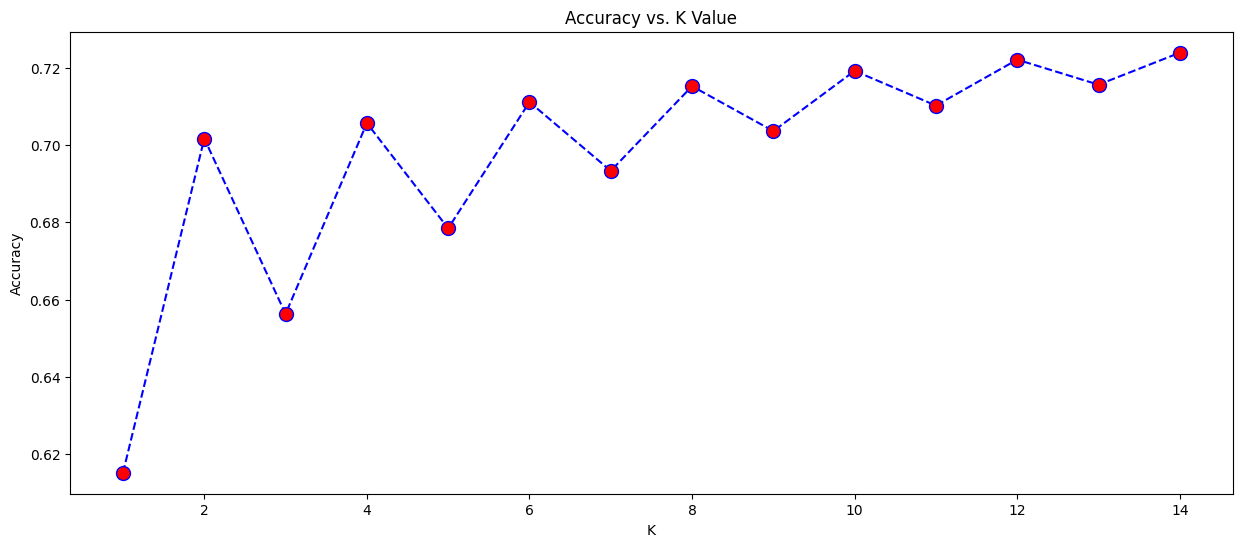

In [88]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors=14)

# Menggunakan .values.ravel() untuk mengubah bentuk y_train
knn.fit(X_train, y_train.values.ravel())  # Perubahan di sini

# Melakukan prediksi
y_pred = knn.predict(X_test)

# Jika ingin mencetak hasil prediksi
print("Predictions:", y_pred)

Predictions: [0 0 0 ... 0 0 0]


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_scaled, y_train.values.ravel())
y_pred = knn.predict(X_test_scaled)

print("Predictions:", y_pred)

Predictions: [0 0 0 ... 1 0 0]


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

# Menghitung metrik
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86467  4474]
 [28859  4331]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     90941
           1       0.49      0.13      0.21     33190

    accuracy                           0.73    124131
   macro avg       0.62      0.54      0.52    124131
weighted avg       0.68      0.73      0.67    124131



In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 60.78%


In [67]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.73      0.98      0.84     90941
     Delayed       0.31      0.03      0.05     33190

    accuracy                           0.72    124131
   macro avg       0.52      0.50      0.44    124131
weighted avg       0.62      0.72      0.63    124131



In [94]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membagi dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=14)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi
y_pred = knn.predict(X_test)

# Evaluasi hasil
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61     90766
           1       0.61      0.61      0.61     90743

    accuracy                           0.61    181509
   macro avg       0.61      0.61      0.61    181509
weighted avg       0.61      0.61      0.61    181509



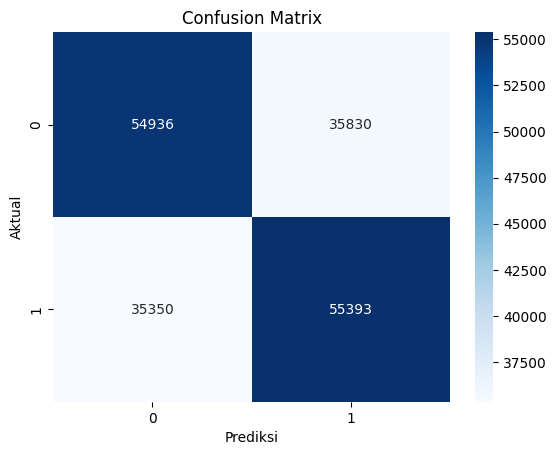

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

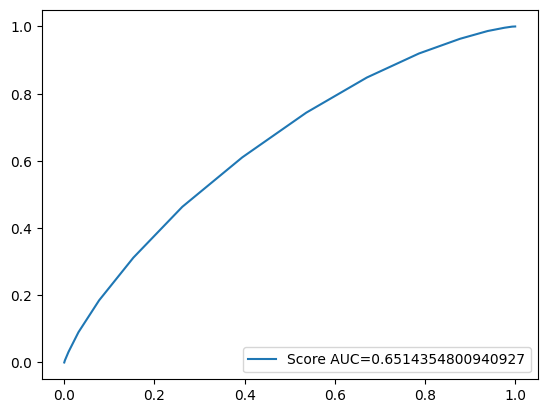

In [96]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [100]:
print("Class distribution in the training set:")
print(y_train.value_counts())

print("Class distribution in the test set:")
print(y_test.value_counts())

Class distribution in the training set:
Family History of Depression
1    211772
0    211749
Name: count, dtype: int64
Class distribution in the test set:
Family History of Depression
0    90766
1    90743
Name: count, dtype: int64
